# Crop Price Prediction

### Data preprocessing

In [1]:
import pandas as pd
import numpy as np

excel_data = pd.read_excel('./Dataset/Modal price included.xlsx')
dataframe = pd.DataFrame(excel_data)

In [2]:
dataframe.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,BANTWALA,2022-04-01 00:00:00,COCA,AVERAGE,20.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
1,NaN,2022-04-04 00:00:00,COCA,AVERAGE,12.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
2,NaN,2022-04-05 00:00:00,COCA,AVERAGE,17.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
3,NaN,2022-04-06 00:00:00,COCA,AVERAGE,28.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
4,NaN,2022-04-07 00:00:00,COCA,AVERAGE,13.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    876 non-null    object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 694.6+ KB


In [4]:
dataframe.isna().sum()

Market      8013
Date         438
Variety      438
Grade        438
Arrivals     438
Unit         438
Min          438
Max          438
Modal        438
District     438
dtype: int64

#### Market coulumn has many NaN vlaues in between, First we fill it by considering the first value in each row

In [5]:
dataframe['Market'] = dataframe['Market'].fillna(method= 'pad')
print('After filling the null values')
dataframe.isna().sum()

After filling the null values


C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15552\67647881.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe['Market'] = dataframe['Market'].fillna(method= 'pad')


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [6]:
dataframe.tail()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
8884,SULYA,2022-09-12 00:00:00,BLACK PEPPER,AVERAGE,11.0,Quintal,30000.0,49500.0,46300.0,Dakshina Kannada
8885,SULYA,2022-09-19 00:00:00,BLACK PEPPER,AVERAGE,16.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8886,SULYA,2022-09-28 00:00:00,BLACK PEPPER,AVERAGE,30.0,Quintal,30000.0,49500.0,48700.0,Dakshina Kannada
8887,SULYA,2022-09-30 00:00:00,BLACK PEPPER,AVERAGE,12.0,Quintal,30000.0,49000.0,40000.0,Dakshina Kannada
8888,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### There are some empty rows inbetween we remove it by considering one of the columns NaN value

In [7]:
print('Before removing Null values: ')
dataframe.isna().sum()

Before removing Null values: 


Market        0
Date        438
Variety     438
Grade       438
Arrivals    438
Unit        438
Min         438
Max         438
Modal       438
District    438
dtype: int64

In [8]:
dataframe = dataframe.dropna(subset=['Unit'])

In [9]:
print('After removing Null values: ')
dataframe.isna().sum()

After removing Null values: 


Market      0
Date        0
Variety     0
Grade       0
Arrivals    0
Unit        0
Min         0
Max         0
Modal       0
District    0
dtype: int64

#### Additional information

In [10]:
dataframe.describe()

,Arrivals,Min,Max,Modal
count,8451.000000,8451.000000,8451.000000,8451.000000
mean,3083.807242,22540.610342,33188.377588,28955.751035
std,21716.029849,10651.062144,11636.051360,10915.411474
min,1.000000,800.000000,1600.000000,1400.000000
25%,16.000000,12500.000000,25000.000000,20000.000000
50%,56.000000,22500.000000,31800.000000,27500.000000
75%,245.000000,28500.000000,43000.000000,37000.000000
max,755975.000000,51250.000000,58000.000000,53000.000000


In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8451 entries, 0 to 8887
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Market    8451 non-null   object 
 1   Date      8451 non-null   object 
 2   Variety   8451 non-null   object 
 3   Grade     8451 non-null   object 
 4   Arrivals  8451 non-null   float64
 5   Unit      8451 non-null   object 
 6   Min       8451 non-null   float64
 7   Max       8451 non-null   float64
 8   Modal     8451 non-null   float64
 9   District  8451 non-null   object 
dtypes: float64(4), object(6)
memory usage: 726.3+ KB


#### Converting the Date from object type to datetime type

In [12]:
df = dataframe
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


#### Sorting the date

In [13]:
df.sort_values(by='Date',inplace=True)
df.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
3007,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
4754,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4706,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada


In [14]:
df.reset_index(drop=True)

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
0,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
1,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
2,BELTHANGADI,2020-01-01,OTHER,AVERAGE,3.0,Quintal,21000.0,22000.0,21500.0,Dakshina Kannada
3,MANGALURU,2020-01-01,OLD VARIETY,AVERAGE,95.0,Quintal,25000.0,29500.0,28000.0,Dakshina Kannada
4,MANGALURU,2020-01-01,COCA,AVERAGE,100.0,Quintal,16000.0,21500.0,19000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
8446,BANTWALA,2022-12-31,COCA,AVERAGE,39.0,Quintal,12500.0,25000.0,22500.0,Dakshina Kannada
8447,BANTWALA,2022-12-31,NEW VARIETY,AVERAGE,4.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
8448,BELTHANGADI,2022-12-31,COCA,AVERAGE,50.0,Quintal,23000.0,24000.0,23500.0,Dakshina Kannada
8449,BELTHANGADI,2022-12-31,OLD VARIETY,AVERAGE,317.0,Quintal,43600.0,48000.0,46000.0,Dakshina Kannada


In [15]:
df['Variety'].unique()

array(['NEW VARIETY', 'OTHER', 'OLD VARIETY', 'COCA', 'GRADE- II',
       'GRADE-I', 'BLACK PEPPER', 'MEDIUM', 'COCONUT'], dtype=object)

### Exploratory Data Analysis
#### Visualize the data

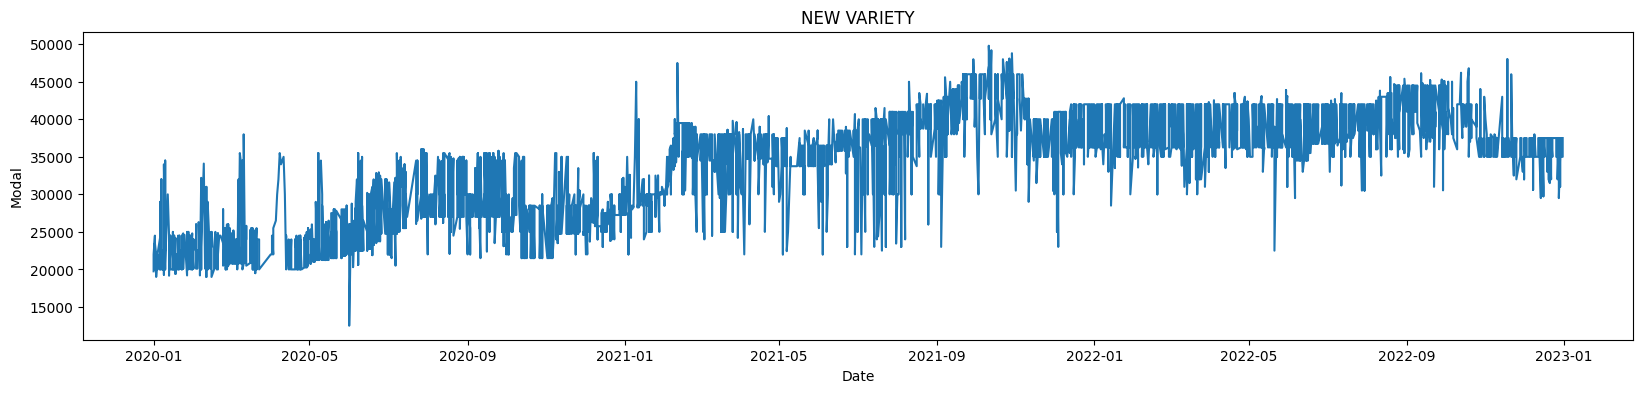

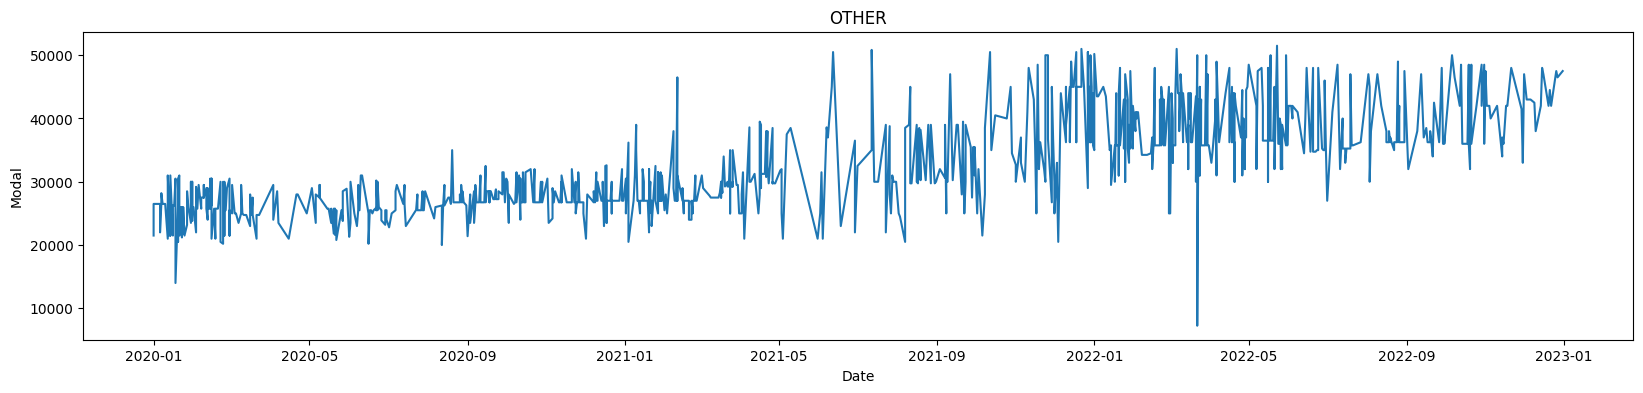

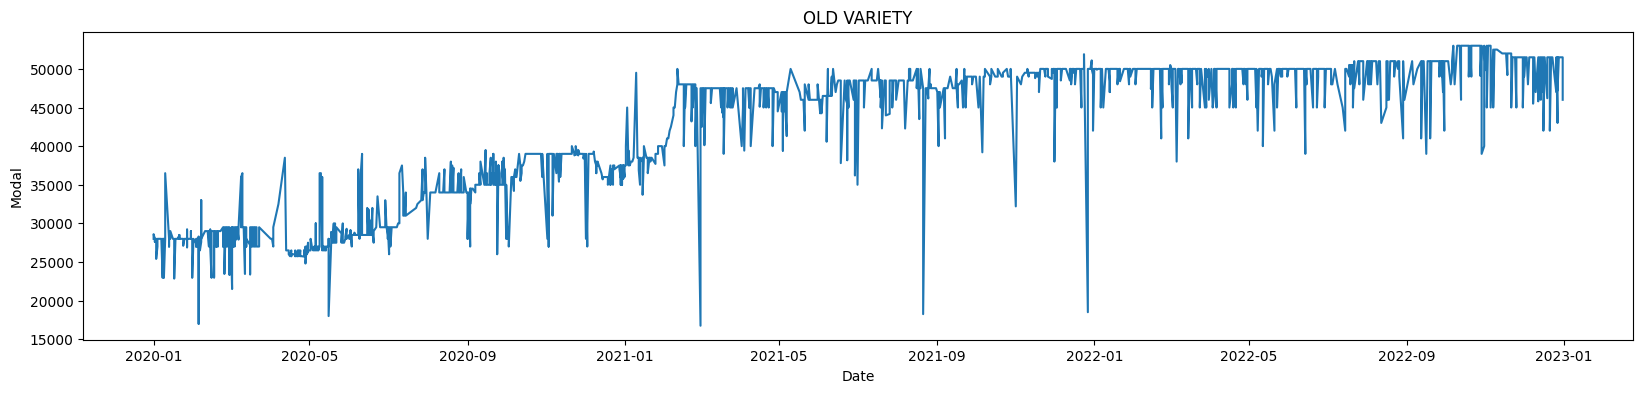

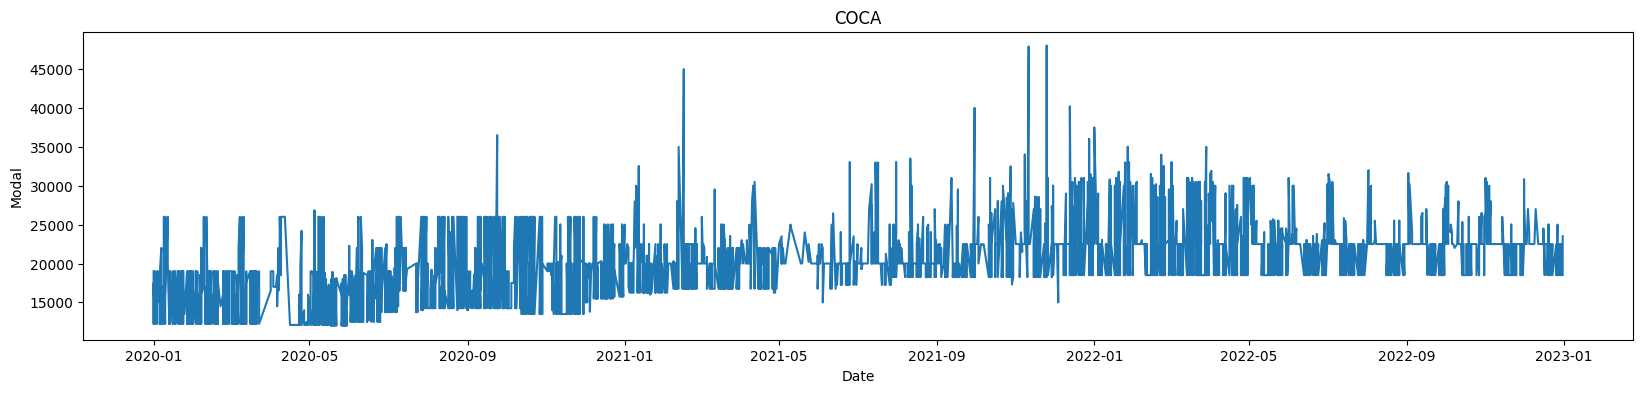

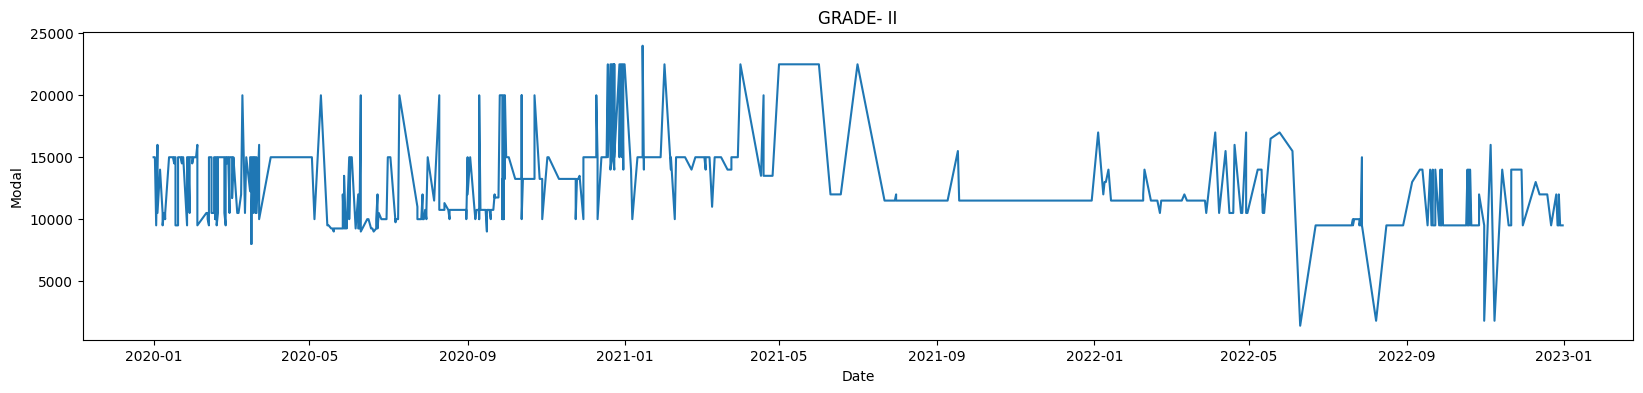

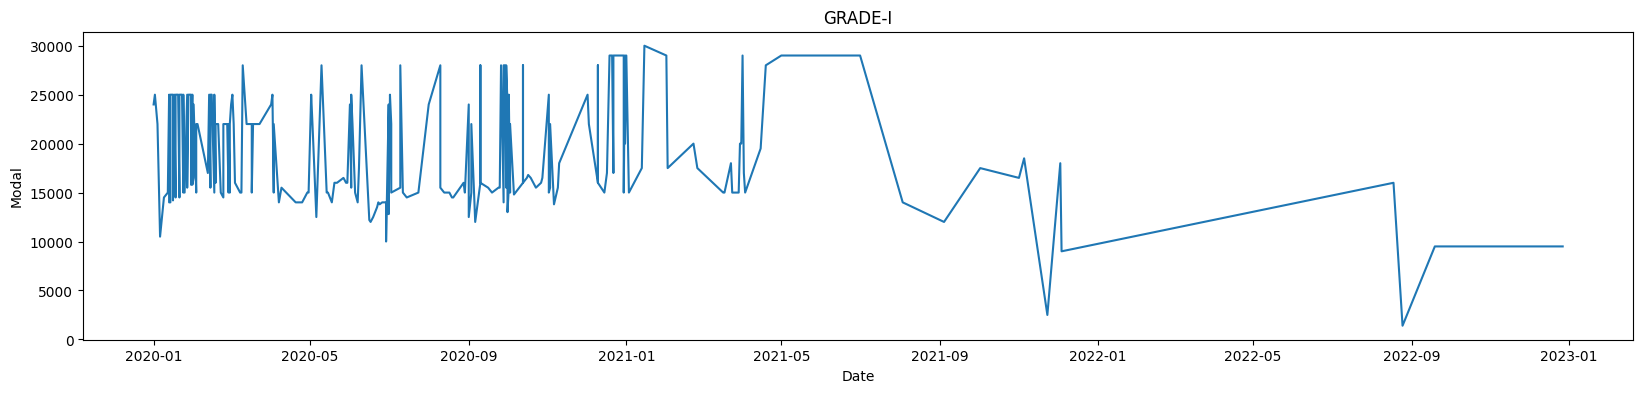

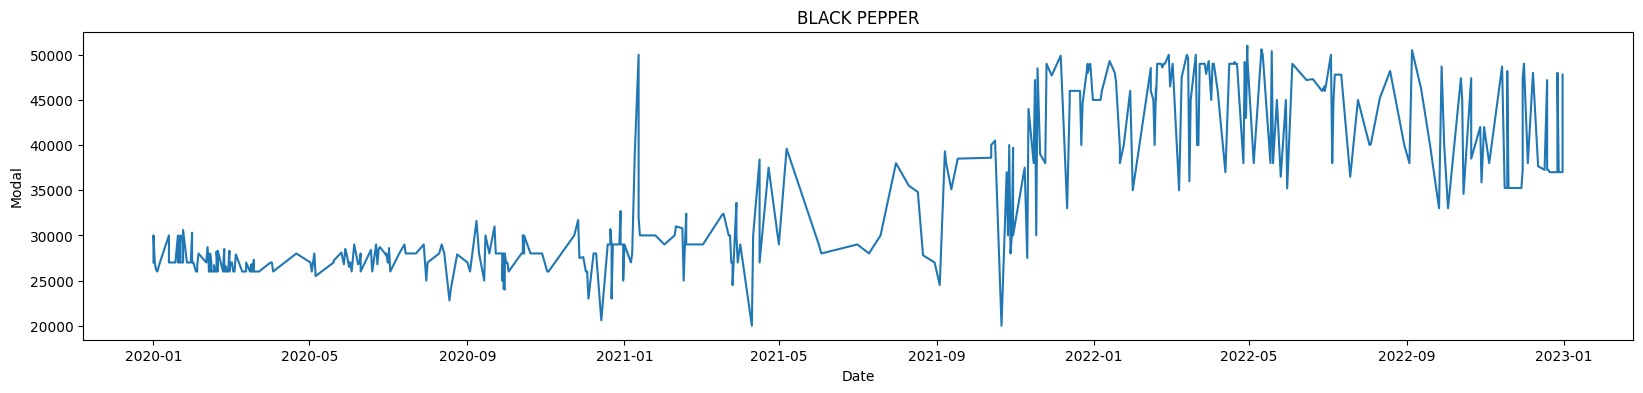

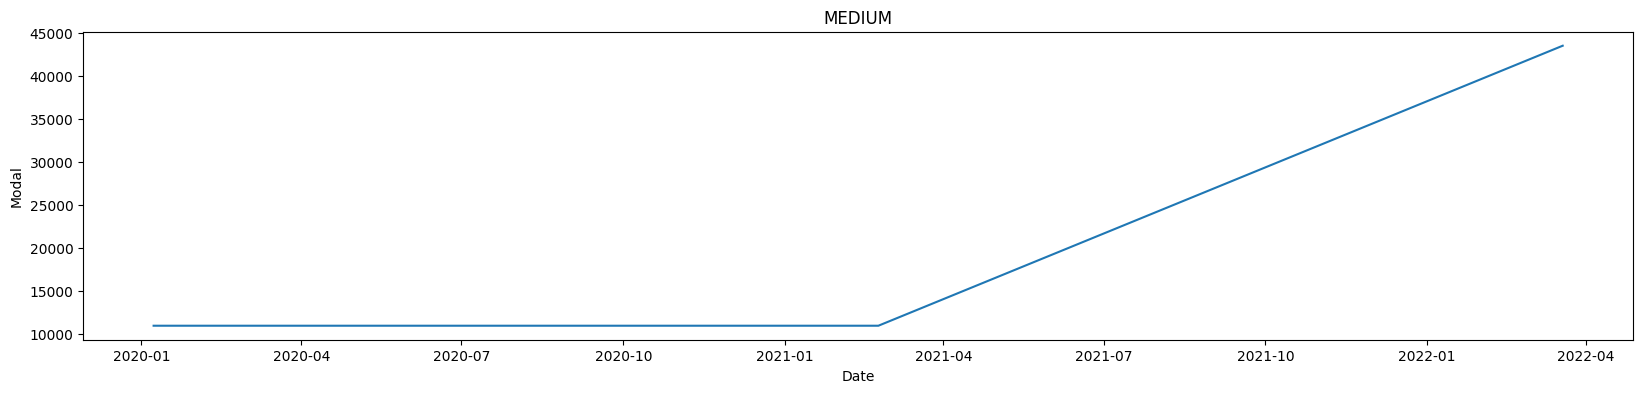

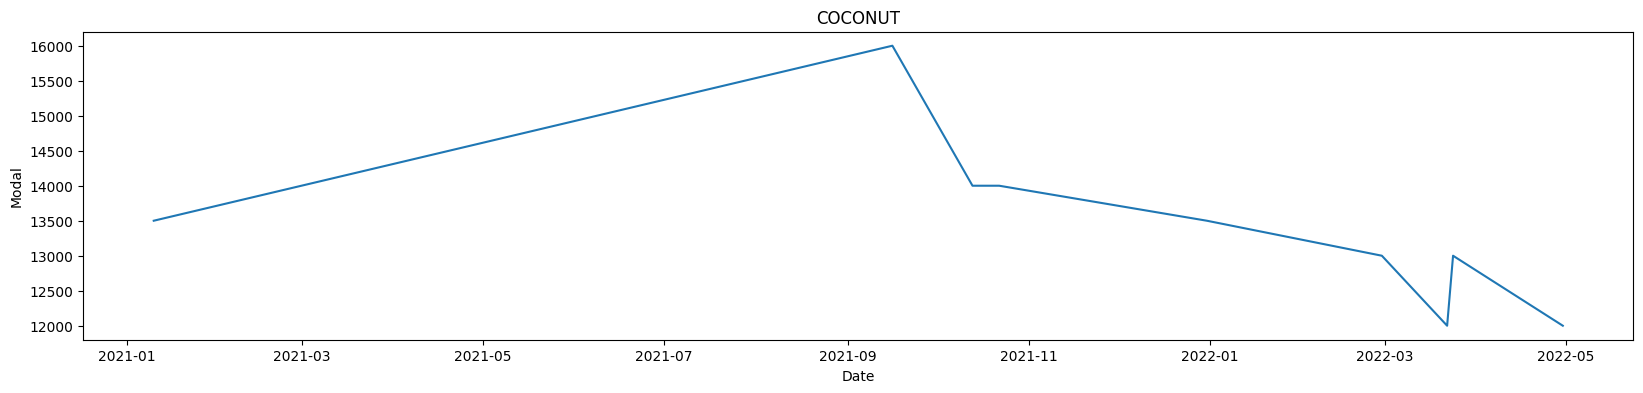

In [16]:
from matplotlib import pyplot as plt

varieties = list(df['Variety'].unique())
df2 = df
for variety in varieties:
    subset = df2[df2['Variety'] == variety]
    plt.figure(figsize=(20,4))
    plt.plot(subset['Date'],subset['Modal'])
    plt.title(variety)
    plt.xlabel('Date')
    plt.ylabel('Modal')
    plt.show()


### Augmented Dickey-Fuller Test (ADF Test) to check stationarity
#### The function to check adf test is as follows

    def adfuller_test(Modal):
        result = adfuller(Modal)
        labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
        for values, label in zip(result, lables):
            print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("The time series is likely stationary.")
        else:
            print("The time series is likely non-stationary.")

In [17]:
ignore_variety = ['MEDIUM','COCONUT']

from statsmodels.tsa.stattools import adfuller

labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
non_stationary = {}
for variety in varieties:
    if variety not in ignore_variety:
        subset = df2[df2['Variety'] == variety]
        time_series = subset['Modal']
        result = adfuller(time_series)

        print(f'For variety: {variety}')
        for value, label in zip(result, labels):
            #print(f'p_value for variety {variety} is {p_value}')
            print(label+' : '+str(value))
        if result[1]<= 0.05:
            print("The time series is likely stationary.")
        else:
            non_stationary[variety] = result[1]
            print("The time series is likely non-stationary.")
        print('------------------------------------------------------------')

For variety: NEW VARIETY
ADF test statistic : -2.002347176236761
p-value : 0.28554489346777956
Lags used : 23
No. of observations used : 2648
The time series is likely non-stationary.
------------------------------------------------------------
For variety: OTHER
ADF test statistic : -0.8940091205367166
p-value : 0.7899388974543333
Lags used : 18
No. of observations used : 868
The time series is likely non-stationary.
------------------------------------------------------------
For variety: OLD VARIETY
ADF test statistic : -1.2432639386541953
p-value : 0.6547134342403562
Lags used : 23
No. of observations used : 1300
The time series is likely non-stationary.
------------------------------------------------------------
For variety: COCA
ADF test statistic : -3.3146013893032937
p-value : 0.014238275229952826
Lags used : 25
No. of observations used : 2322
The time series is likely stationary.
------------------------------------------------------------
For variety: GRADE- II
ADF test stat

In [18]:
non_stationary_varieties = list(non_stationary.keys())
print(non_stationary_varieties)

['NEW VARIETY', 'OTHER', 'OLD VARIETY', 'BLACK PEPPER']


#### First difference for each variety to make it stationary

In [19]:
df_newvariety = df2[df2['Variety'] == 'NEW VARIETY']
df_newvariety

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada
1296,BANTWALA,2020-01-01,NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada
2824,BELTHANGADI,2020-01-02,NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada
1297,BANTWALA,2020-01-02,NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada
...,...,...,...,...,...,...,...,...,...,...
171,BANTWALA,2022-12-30,NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada
6141,PUTTUR,2022-12-30,NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada
6142,PUTTUR,2022-12-31,NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada
2800,BELTHANGADI,2022-12-31,NEW VARIETY,AVERAGE,449.0,Quintal,33600.0,37000.0,35000.0,Dakshina Kannada


In [20]:
df_newvariety['Modal First difference'] = df_newvariety['Modal'] - df_newvariety['Modal'].shift(1)
df_newvariety.head()

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15552\3716414840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newvariety['Modal First difference'] = df_newvariety['Modal'] - df_newvariety['Modal'].shift(1)


,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
6296,PUTTUR,2020-01-01,NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada,NaN
4730,MANGALURU,2020-01-01,NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
1296,BANTWALA,2020-01-01,NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2824,BELTHANGADI,2020-01-02,NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
1297,BANTWALA,2020-01-02,NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0


In [21]:
labels = ['ADF test statistic', 'p-value', 'Lags used', 'No. of observations used']
def adfuller_test(Modal):
        result = adfuller(Modal)
        for values, label in zip(result, labels):
            print(label+' : '+str(values))
        if result[1] <= 0.05:
            print("The time series is likely stationary.")
        else:
            print("The time series is likely non-stationary.")

In [22]:
adfuller_test(df_newvariety['Modal First difference'].dropna())

ADF test statistic : -14.7612664663347
p-value : 2.400235273967914e-27
Lags used : 28
No. of observations used : 2642
The time series is likely stationary.


#### Changing the new variety to pepper new variety

In [23]:
df_newvariety['Variety'] = df_newvariety['Variety'].replace({'NEW VARIETY':'PEPPER NEW VARIETY'})
df_newvariety.reset_index(drop=True)

C:\Users\SUJAN ACHARYA\AppData\Local\Temp\ipykernel_15552\880231541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_newvariety['Variety'] = df_newvariety['Variety'].replace({'NEW VARIETY':'PEPPER NEW VARIETY'})


,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
0,PUTTUR,2020-01-01,PEPPER NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada,NaN
1,MANGALURU,2020-01-01,PEPPER NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
2,BANTWALA,2020-01-01,PEPPER NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
3,BELTHANGADI,2020-01-02,PEPPER NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
4,BANTWALA,2020-01-02,PEPPER NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0
...,...,...,...,...,...,...,...,...,...,...,...
2667,BANTWALA,2022-12-30,PEPPER NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada,0.0
2668,PUTTUR,2022-12-30,PEPPER NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,-2500.0
2669,PUTTUR,2022-12-31,PEPPER NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,0.0
2670,BELTHANGADI,2022-12-31,PEPPER NEW VARIETY,AVERAGE,449.0,Quintal,33600.0,37000.0,35000.0,Dakshina Kannada,0.0


In [25]:
df_all_newvariety = df_newvariety.dropna()
df_all_newvariety.index = df_all_newvariety['Date']
df_all_newvariety

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
Date,,,,,,,,,,,
2020-01-01,MANGALURU,2020-01-01,PEPPER NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
2020-01-01,BANTWALA,2020-01-01,PEPPER NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2020-01-02,BELTHANGADI,2020-01-02,PEPPER NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
2020-01-02,BANTWALA,2020-01-02,PEPPER NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0
2020-01-02,PUTTUR,2020-01-02,PEPPER NEW VARIETY,AVERAGE,185.0,Quintal,15000.0,25000.0,20000.0,Dakshina Kannada,-2000.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,BANTWALA,2022-12-30,PEPPER NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada,0.0
2022-12-30,PUTTUR,2022-12-30,PEPPER NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,-2500.0
2022-12-31,PUTTUR,2022-12-31,PEPPER NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,0.0


<Axes: xlabel='Date'>

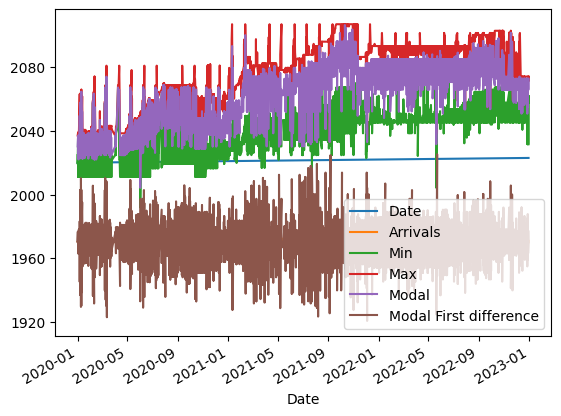

In [26]:
df_all_newvariety.plot()

In [27]:
df_all_newvariety.head()

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
Date,,,,,,,,,,,
2020-01-01,MANGALURU,2020-01-01,PEPPER NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
2020-01-01,BANTWALA,2020-01-01,PEPPER NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2020-01-02,BELTHANGADI,2020-01-02,PEPPER NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
2020-01-02,BANTWALA,2020-01-02,PEPPER NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0
2020-01-02,PUTTUR,2020-01-02,PEPPER NEW VARIETY,AVERAGE,185.0,Quintal,15000.0,25000.0,20000.0,Dakshina Kannada,-2000.0


In [28]:
all_newvariety_modal = df_all_newvariety['Modal First difference']
all_newvariety_modal.head()

Date
2020-01-01    2250.0
2020-01-01       0.0
2020-01-02    2500.0
2020-01-02   -2500.0
2020-01-02   -2000.0
Name: Modal First difference, dtype: float64

In [52]:
all_newvariety_modal

Date
2020-01-01    2250.0
2020-01-01       0.0
2020-01-02    2500.0
2020-01-02   -2500.0
2020-01-02   -2000.0
               ...  
2022-12-30       0.0
2022-12-30   -2500.0
2022-12-31       0.0
2022-12-31       0.0
2022-12-31    2500.0
Name: Modal First difference, Length: 2671, dtype: float64

In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler_all = MinMaxScaler(feature_range=(0,1))
all_newvariety_modal = scaler_all.fit_transform(np.array(all_newvariety_modal).reshape(-1,1))

In [29]:
all_newvariety_modal

array([[0.53010471],
       [0.47120419],
       [0.53664921],
       ...,
       [0.47120419],
       [0.47120419],
       [0.53664921]])

In [56]:
def df_to_X_y(df, window_size=30):
    #df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df)-window_size):
        row = [[a] for a in df[i:i+window_size]]
        X.append(row)
        label = df[i+window_size]
        y.append(label)
    return np.array(X),np.array(y)


In [57]:
WINDOW_SIZE = 100 
X, y = df_to_X_y(all_newvariety_modal, WINDOW_SIZE)

In [58]:
X.shape, y.shape

((2571, 100, 1, 1), (2571, 1))

In [59]:
# Reshape X and y to the desired dimensions
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])
y = y.reshape(y.shape[0])

In [60]:
X.shape, y.shape

((2571, 100, 1), (2571,))

In [61]:
X_train, y_train = X[:1800], y[:1800]
X_val, y_val= X[1800:2200], y[1800:2200]
X_test, y_test= X[2200:], y[2200:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1800, 100, 1), (1800,), (400, 100, 1), (400,), (371, 100, 1), (371,))

all_train_mean = np.mean(X_train[:, :, 0])
all_train_std = np.std(X_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - all_train_mean)/ all_train_std
    return X

preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [45]:
model_all_newvariety = Sequential()
model_all_newvariety.add(InputLayer((100,1)))
model_all_newvariety.add(LSTM(64))
model_all_newvariety.add(Dense(8, 'relu'))
model_all_newvariety.add(Dense(1, 'linear'))

model_all_newvariety.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
cp = ModelCheckpoint('models/model_all_newvariety/', save_best_only=True)
model_all_newvariety.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [63]:
hist_all = model_all_newvariety.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/20


56/57 [============================>.] - ETA: 0s - loss: 0.0190 - root_mean_squared_error: 0.1378INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 9s 116ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322
Epoch 2/20
57/57 [==============================] - 3s 55ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1327
Epoch 3/20
57/57 [==============================] - 3s 59ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 4/20
57/57 [==============================] - ETA: 0s - loss: 0.0187 - root_mean_squared_error: 0.1368INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 104ms/step - loss: 0.0187 - root_mean_squared_error: 0.1368 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 5/20
57/57 [==============================] - 3s 50ms/step - loss: 0.0187 - root_mean_squared_error: 0.1368 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1333
Epoch 6/20
57/57 [==============================] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1370INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 100ms/step - loss: 0.0188 - root_mean_squared_error: 0.1370 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1309
Epoch 7/20
56/57 [============================>.] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1374INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 103ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1307
Epoch 8/20
57/57 [==============================] - 3s 53ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1321
Epoch 9/20
56/57 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1355INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 102ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1303
Epoch 10/20
57/57 [==============================] - 3s 56ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1314
Epoch 11/20
56/57 [============================>.] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.1352INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 7s 117ms/step - loss: 0.0183 - root_mean_squared_error: 0.1353 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1291
Epoch 12/20
56/57 [============================>.] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1349INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 106ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1287
Epoch 13/20
57/57 [==============================] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1343INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 110ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1285
Epoch 14/20
57/57 [==============================] - ETA: 0s - loss: 0.0178 - root_mean_squared_error: 0.1336INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 7s 120ms/step - loss: 0.0178 - root_mean_squared_error: 0.1336 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1275
Epoch 15/20
56/57 [============================>.] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.1326INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 8s 137ms/step - loss: 0.0175 - root_mean_squared_error: 0.1324 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 16/20
57/57 [==============================] - 3s 54ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1279
Epoch 17/20
56/57 [============================>.] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.1312INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 101ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1255
Epoch 18/20
56/57 [============================>.] - ETA: 0s - loss: 0.0170 - root_mean_squared_error: 0.1304INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 6s 107ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 19/20
57/57 [==============================] - 3s 56ms/step - loss: 0.0170 - root_mean_squared_error: 0.1303 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 20/20
56/57 [============================>.] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1294INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


INFO:tensorflow:Assets written to: models/model_all_newvariety\assets


57/57 [==============================] - 7s 119ms/step - loss: 0.0168 - root_mean_squared_error: 0.1295 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1242


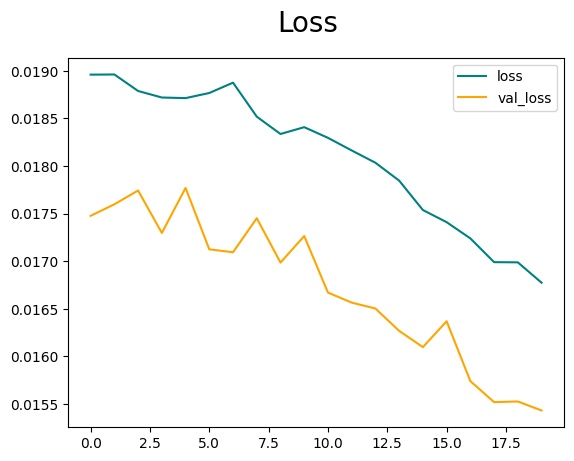

In [64]:
fig = plt.figure()
plt.plot(hist_all.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist_all.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [71]:
from tensorflow.keras.models import load_model

model_all_newvariety = load_model('models/model_all_newvariety')

In [72]:
train_prediction = model_all_newvariety.predict(X_train).flatten()

57/57 [==============================] - 2s 21ms/step


In [73]:
train_prediction.shape

(1800,)

In [67]:
train_results = pd.DataFrame(data={'Train Predictions':train_prediction,'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.450798,0.536649
1,0.443148,0.418848
2,0.457247,0.531414
3,0.445887,0.397906
4,0.462430,0.421466
...,...,...
1795,0.446962,0.320681
1796,0.475447,0.621728
1797,0.441119,0.418848
1798,0.458340,0.373037


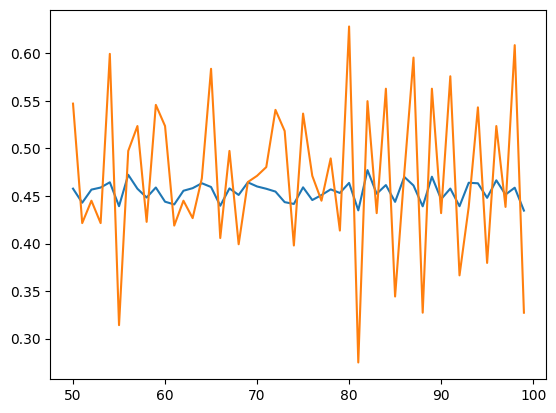

In [77]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])


In [79]:
val_prediction = model_all_newvariety.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_prediction,'Actuals':y_val})
val_results

13/13 [==============================] - 0s 22ms/step


,Val Predictions,Actuals
0,0.463225,0.438482
1,0.464993,0.654450
2,0.431260,0.471204
3,0.443932,0.366492
4,0.464488,0.425393
...,...,...
395,0.472634,0.497382
396,0.458648,0.589005
397,0.439273,0.340314
398,0.468234,0.641361


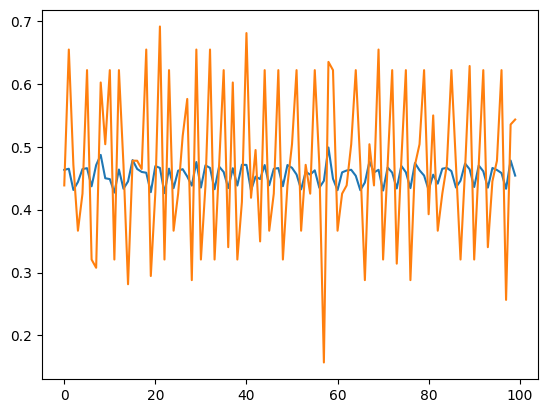

In [82]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [86]:
test_prediction = model_all_newvariety.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_prediction,'Actuals':y_test})
test_results

12/12 [==============================] - 0s 24ms/step


,Test Predictions,Actuals
0,0.484460,0.397906
1,0.479045,0.753927
2,0.423311,0.340314
3,0.461214,0.591623
4,0.436441,0.350785
...,...,...
366,0.432533,0.471204
367,0.444306,0.405759
368,0.458421,0.471204
369,0.455708,0.471204


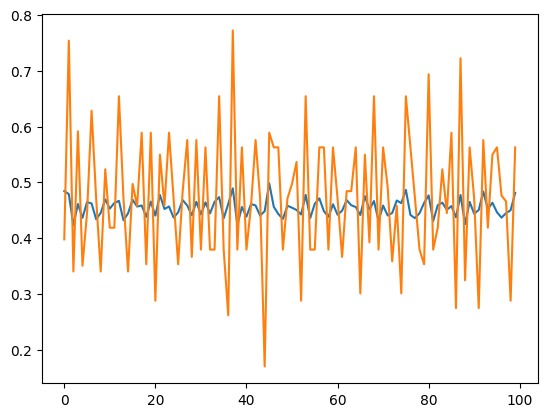

In [87]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

#### Plot for stionary data:)

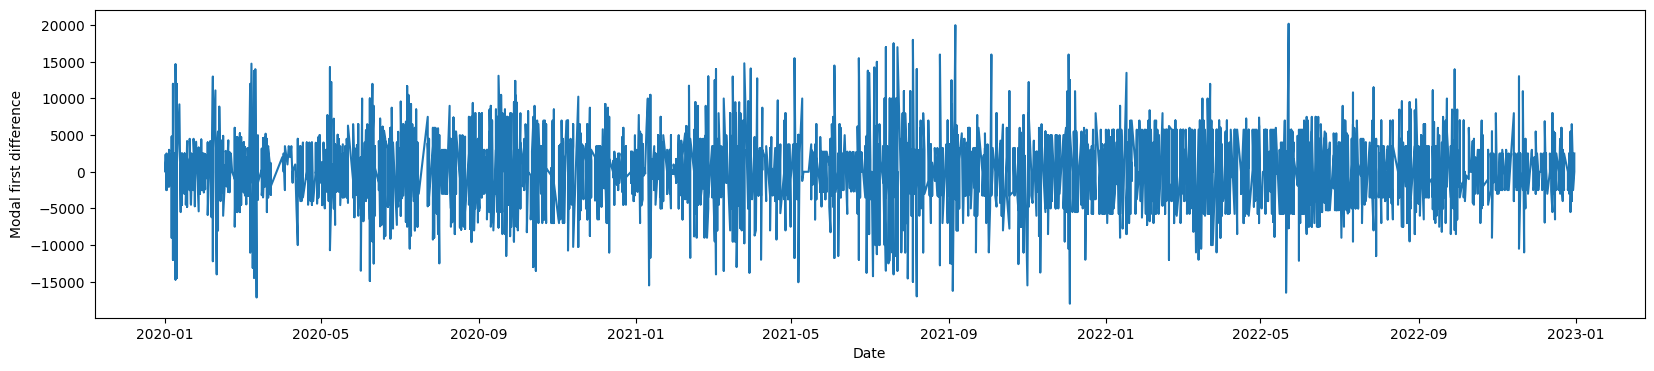

In [30]:
plt.figure(figsize=(20,4))
plt.plot(df_newvariety['Date'],df_newvariety['Modal First difference'])
plt.xlabel('Date')
plt.ylabel('Modal first difference')
plt.show()

In [179]:
df_newvariety

,Market,Date,Variety,Grade,Arrivals,Unit,Min,Max,Modal,District,Modal First difference
6296,PUTTUR,2020-01-01,PEPPER NEW VARIETY,AVERAGE,310.0,Quintal,15000.0,24500.0,19750.0,Dakshina Kannada,NaN
4730,MANGALURU,2020-01-01,PEPPER NEW VARIETY,AVERAGE,85.0,Quintal,20000.0,24500.0,22000.0,Dakshina Kannada,2250.0
1296,BANTWALA,2020-01-01,PEPPER NEW VARIETY,AVERAGE,80.0,Quintal,18000.0,24500.0,22000.0,Dakshina Kannada,0.0
2824,BELTHANGADI,2020-01-02,PEPPER NEW VARIETY,AVERAGE,312.0,Quintal,24000.0,25100.0,24500.0,Dakshina Kannada,2500.0
1297,BANTWALA,2020-01-02,PEPPER NEW VARIETY,AVERAGE,50.0,Quintal,18000.0,24800.0,22000.0,Dakshina Kannada,-2500.0
...,...,...,...,...,...,...,...,...,...,...,...
171,BANTWALA,2022-12-30,PEPPER NEW VARIETY,AVERAGE,3.0,Quintal,22500.0,38000.0,37500.0,Dakshina Kannada,0.0
6141,PUTTUR,2022-12-30,PEPPER NEW VARIETY,AVERAGE,175.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,-2500.0
6142,PUTTUR,2022-12-31,PEPPER NEW VARIETY,AVERAGE,133.0,Quintal,32000.0,38000.0,35000.0,Dakshina Kannada,0.0
2800,BELTHANGADI,2022-12-31,PEPPER NEW VARIETY,AVERAGE,449.0,Quintal,33600.0,37000.0,35000.0,Dakshina Kannada,0.0


In [102]:
df_test_newvariety = df_newvariety.reset_index()['Modal First difference'].dropna()
#plt.plot(df_test_newvariety)

In [103]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_test_newvariety = scaler.fit_transform(np.array(df_test_newvariety).reshape(-1,1))
print(df_test_newvariety)

[[0.53010471]
 [0.47120419]
 [0.53664921]
 ...
 [0.47120419]
 [0.47120419]
 [0.53664921]]


#### Preparing train and test data for pepper new_variety

In [104]:
train_size = int(len(df_test_newvariety)*0.8)
test_size = len(df_test_newvariety) - train_size
train_data, test_data = df_test_newvariety[:train_size], df_test_newvariety[train_size:(train_size+test_size)]

In [105]:
train_data.shape, test_data.shape

((2136, 1), (535, 1))

In [110]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [111]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [112]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (2035, 100)
X_test:  (434, 100)
y_train:  (2035,)
y_test:  (434,)


In [113]:
print(X_train)

[[0.53010471 0.47120419 0.53664921 ... 0.48429319 0.40575916 0.52356021]
 [0.47120419 0.53664921 0.40575916 ... 0.40575916 0.52356021 0.53664921]
 [0.53664921 0.40575916 0.41884817 ... 0.52356021 0.53664921 0.41884817]
 ...
 [0.43848168 0.65445026 0.20942408 ... 0.62172775 0.32068063 0.62172775]
 [0.65445026 0.20942408 0.58246073 ... 0.32068063 0.62172775 0.36649215]
 [0.20942408 0.58246073 0.47120419 ... 0.62172775 0.36649215 0.42539267]]


In [114]:
print(y_train)

[0.53664921 0.41884817 0.53141361 ... 0.36649215 0.42539267 0.62172775]


In [115]:
# reshape input to be [sample, time_steps, features] which is required for LSTM

X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=50, return_sequences = True,input_shape=(100,1)),
    LSTM(units=50, return_sequences = True),
    LSTM(units=50),
    Dense(units=1)
])  

model.compile(loss='mean_squared_error',optimizer='adam')


In [117]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model_pepper_newvariety = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=64,shuffle=True,verbose=2)

Epoch 1/30
32/32 - 14s - loss: 0.0495 - val_loss: 0.0138 - 14s/epoch - 427ms/step
Epoch 2/30
32/32 - 8s - loss: 0.0195 - val_loss: 0.0138 - 8s/epoch - 243ms/step
Epoch 3/30
32/32 - 8s - loss: 0.0191 - val_loss: 0.0138 - 8s/epoch - 241ms/step
Epoch 4/30
32/32 - 8s - loss: 0.0191 - val_loss: 0.0137 - 8s/epoch - 239ms/step
Epoch 5/30
32/32 - 8s - loss: 0.0191 - val_loss: 0.0139 - 8s/epoch - 237ms/step
Epoch 6/30
32/32 - 8s - loss: 0.0191 - val_loss: 0.0138 - 8s/epoch - 238ms/step
Epoch 7/30
32/32 - 8s - loss: 0.0193 - val_loss: 0.0138 - 8s/epoch - 236ms/step
Epoch 8/30
32/32 - 8s - loss: 0.0195 - val_loss: 0.0138 - 8s/epoch - 243ms/step
Epoch 9/30
32/32 - 8s - loss: 0.0191 - val_loss: 0.0139 - 8s/epoch - 240ms/step
Epoch 10/30
32/32 - 8s - loss: 0.0192 - val_loss: 0.0137 - 8s/epoch - 243ms/step
Epoch 11/30
32/32 - 8s - loss: 0.0193 - val_loss: 0.0144 - 8s/epoch - 243ms/step
Epoch 12/30
32/32 - 8s - loss: 0.0195 - val_loss: 0.0149 - 8s/epoch - 246ms/step
Epoch 13/30
32/32 - 8s - loss: 0.01

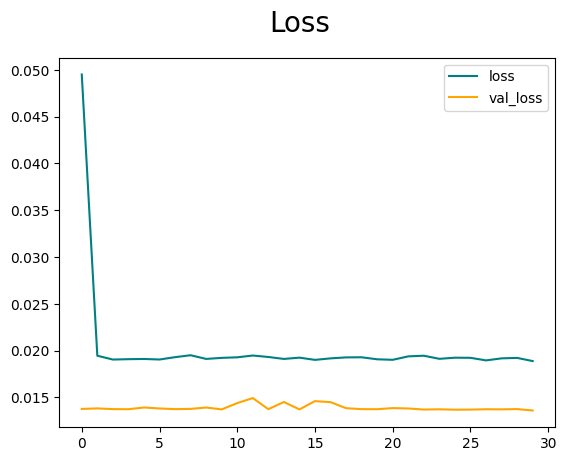

In [119]:
fig = plt.figure()
plt.plot(model_pepper_newvariety.history['loss'],color = 'teal',label = 'loss')
plt.plot(model_pepper_newvariety.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [89]:
model2 = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(100,1)),
    Dense(units=50),
    Dense(units=1)
])

model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])


In [63]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 64)           16896     
                                                                 
 dense_4 (Dense)             (None, 100, 50)           3250      
                                                                 
 dense_5 (Dense)             (None, 100, 1)            51        
                                                                 
Total params: 20,197
Trainable params: 20,197
Non-trainable params: 0
_________________________________________________________________


In [92]:
model2_pepper_new_variety = model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=30, batch_size=32, shuffle=True,verbose=2)

Epoch 1/30
57/57 - 3s - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0148 - val_mse: 0.0148 - 3s/epoch - 61ms/step
Epoch 2/30
57/57 - 3s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0146 - val_mse: 0.0146 - 3s/epoch - 50ms/step
Epoch 3/30
57/57 - 3s - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0142 - val_mse: 0.0142 - 3s/epoch - 52ms/step
Epoch 4/30
57/57 - 3s - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0152 - val_mse: 0.0152 - 3s/epoch - 51ms/step
Epoch 5/30
57/57 - 3s - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0140 - val_mse: 0.0140 - 3s/epoch - 51ms/step
Epoch 6/30
57/57 - 3s - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0139 - val_mse: 0.0139 - 3s/epoch - 53ms/step
Epoch 7/30
57/57 - 3s - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0142 - val_mse: 0.0142 - 3s/epoch - 50ms/step
Epoch 8/30
57/57 - 3s - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0138 - val_mse: 0.0138 - 3s/epoch - 51ms/step
Epoch 9/30
57/57 - 3s - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0137 - val_mse: 0.0137 - 3s/epoch - 51ms/step
E

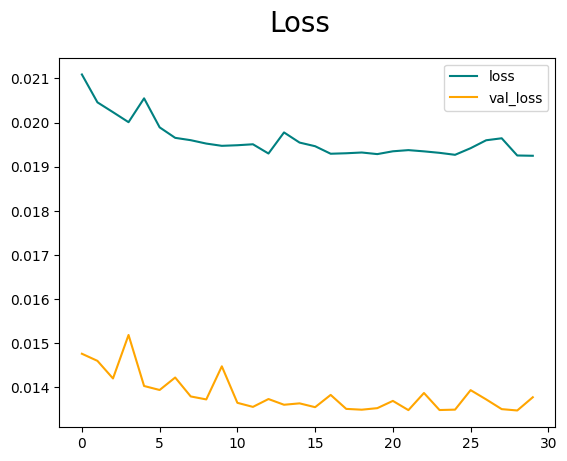

In [93]:
fig = plt.figure()
plt.plot(model2_pepper_new_variety.history['loss'],color = 'teal',label = 'loss')
plt.plot(model2_pepper_new_variety.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

In [99]:
train_predict = model2.predict(X_train,verbose=0).flatten()
test_predict = model2.predict(X_test,verbose=0).flatten()


In [ ]:
train_results = pd.DataFrame(data={'Train Predictions':train_predict,'Actuals':y_train})
train_results

In [100]:
print(train_predict.shape, test_predict.shape)

(180000,) (37100,)


In [60]:
train_predict_2d = train_predict.reshape(train_predict.shape[0],train_predict.shape[1])
test_predict_2d = test_predict.reshape(test_predict.shape[0],test_predict.shape[1])
print(train_predict_2d.shape,test_predict_2d.shape)

(2035, 100) (434, 100)


In [61]:
##### transform to original form

train_predict = scaler.inverse_transform(train_predict_2d)
test_predict = scaler.inverse_transform(test_predict_2d)

print(train_predict.shape, test_predict.shape)

(2035, 100) (434, 100)


#### Check the mse

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(X_train,train_predict))

In [163]:
math.sqrt(mean_squared_error(X_test,test_predict))

374.032389083534

#### Prediciting future dates

#### Random testing data

In [107]:
selected_columns = ['Date','Modal First difference']
df_test1 = df_newvariety[selected_columns].dropna()
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 4730 to 172
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2671 non-null   datetime64[ns]
 1   Modal First difference  2671 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.6 KB


In [109]:
#from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
train = df_test1['Modal First difference'].iloc[:2571]
test = df_test1['Modal First difference'].iloc[2571:]

train = train.values.reshape(-1,1)
test = test.values.reshape(-1,1)

In [115]:
scaler_new = MinMaxScaler()
scaler_new.fit(train)
scaled_train = scaler_new.transform(train)
scaled_test = scaler_new.transform(test)

In [116]:
scaled_train[:10]

array([[0.53010471],
       [0.47120419],
       [0.53664921],
       [0.40575916],
       [0.41884817],
       [0.52356021],
       [0.5104712 ],
       [0.43193717],
       [0.41884817],
       [0.44502618]])

In [118]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [136]:
n_input = 500
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [ ]:
X, y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n{y}')

In [138]:
X.shape

(1, 500, 1)

In [ ]:
model2_test = model2.fit(generator,epochs=20,verbose=2)